In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
import matplotlib as mpl
import matplotlib.font_manager as fm

mpl.rcParams['axes.unicode_minus'] = False


path = '/System/Library/Fonts/AppleSDGothicNeo.ttc'
font_name = fm.FontProperties(fname = path, size = 50).get_name()
plt.rc('font', family = font_name)

In [3]:
dfsb = pd.read_excel('./Preprocessed/saebil.xlsx').drop('Unnamed: 0', axis = 1).assign(cafe = '새빌')
dfbn = pd.read_excel('./Preprocessed/bomnal.xlsx').drop('Unnamed: 0', axis = 1).assign(cafe = '봄날')
dfrn = pd.read_excel('./Preprocessed/지금이순간.xlsx').drop('Unnamed: 0', axis = 1).assign(cafe = '지금이순간')
dfdc = pd.read_excel('./Preprocessed/dolcaron.xlsx').drop('Unnamed: 0', axis = 1).assign(cafe = '돌카롱')
dftb = pd.read_excel('./Preprocessed/tribe.xlsx').drop('Unnamed: 0', axis = 1).assign(cafe = '트라이브')
dfrm = pd.read_excel('./Preprocessed/richmango.xlsx').drop('Unnamed: 0', axis = 1).assign(cafe = '리치망고애월')
dfas = pd.read_excel('./Preprocessed/aewolsunset.xlsx').drop('Unnamed: 0', axis = 1).assign(cafe = '애월더선셋')
dfrd = pd.read_excel('./Preprocessed/randysdonut.xlsx').drop('Unnamed: 0', axis = 1).assign(cafe = '랜디스도넛')
dffv = pd.read_excel('./Preprocessed/firstvacation.xlsx').drop('Unnamed: 0', axis = 1).assign(cafe = '너와의첫여행')
dfad = pd.read_excel('./Preprocessed/aewoldang.xlsx').drop('Unnamed: 0', axis = 1).assign(cafe = '애월당')
dfhe = pd.read_excel('./Preprocessed/highend.xlsx').drop('Unnamed: 0', axis = 1).assign(cafe = '하이엔드제주')
dfss = pd.read_excel('./Preprocessed/somensome.xlsx').drop('Unnamed: 0', axis = 1).assign(cafe = '섬앤썸')

In [4]:
dfsb.drop_duplicates(subset = ['content'], inplace = True)

In [5]:
dfsb = dfsb.reset_index(drop = True)

In [6]:
dfgd = pd.concat([dfsb, dfbn, dfrn, dfdc, dftb, dfrm, dfas, dfrd, dffv, dfad, dfhe, dfss])

In [7]:
dfgd.weekno = dfgd.weekno.astype('int')

In [8]:
dfgd.drop_duplicates(subset = ['content'], inplace = True)

In [9]:
dfgd.head()

,content,date,like,place,tags,month,weekday,weekno,cafe
0,200629 모착친 제주여행 3일차(연청이 진청된 날)...#흑갈비국수매운맛 #흑갈...,2020-07-01,29,NaN,"['#흑갈비국수매운맛', '#흑갈비국수', '#돔베국수', '#하갈비국수', '#새...",7,Wednesday,27,새빌
1,#제주#제주도#jejuisland #새별오름#새빌카페#새빌#saebil#제주카페#우...,2020-07-02,56,Cafè 새빌,"['#제주', '#제주도', '#jejuisland', '#새별오름', '#새빌카페...",7,Thursday,27,새빌
2,삼겹살 갈치조림 고말수제비 산채비빔밥&제육 #7본가 본점 #짱갈비 #덕승식당#새빌 ...,2020-07-02,8,NaN,"['#7본가', '#짱갈비', '#덕승식당', '#새빌', '#참솔식당']",7,Thursday,27,새빌
3,_#휘뚜루마뚜루데일리룩으로도비치룩으로도바지에도치마에도 👌.이런 #매력쟁이 😍.......,2020-07-02,44,애월읍 봉성리,"['#휘뚜루마뚜루데일리룩으로도비치룩으로도바지에도치마에도', '#매력쟁이', '#봉성...",7,Thursday,27,새빌
4,행복한 첫날이었다☘️...#제주도 #오설록 #새별오름 #새빌 #이호테우해변 #구구즈여행,2020-07-02,94,NaN,"['#제주도', '#오설록', '#새별오름', '#새빌', '#이호테우해변', '#...",7,Thursday,27,새빌


In [10]:
dfgd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9507 entries, 0 to 443
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   content  9506 non-null   object        
 1   date     9507 non-null   datetime64[ns]
 2   like     9507 non-null   int64         
 3   place    5954 non-null   object        
 4   tags     9507 non-null   object        
 5   month    9507 non-null   int64         
 6   weekday  9507 non-null   object        
 7   weekno   9507 non-null   int64         
 8   cafe     9507 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 742.7+ KB


In [11]:
dfgd.columns

Index(['content', 'date', 'like', 'place', 'tags', 'month', 'weekday',
       'weekno', 'cafe'],
      dtype='object')

In [12]:
cname = ['cafe', 'content', 'date', 'like', 'place', 'tags', 'month', 'weekday', 'weekno']
dfgd = dfgd.reindex(columns = cname)

In [13]:
dfgd = dfgd.reset_index(drop = True)

In [14]:
dfgd.to_excel('unsortedgroup.xlsx')

In [15]:
dfgd.sort_values('like', ascending = False)[:10]

,cafe,content,date,like,place,tags,month,weekday,weekno
7064,하이엔드제주,사람 짱 많다👀 #하이엔드제주 -#좋반#제주카페#애월카페#오오티디#몸매#데일리코디#...,2020-07-13,7826,하이엔드 제주,"['#하이엔드제주', '#좋반', '#제주카페', '#애월카페', '#오오티디', ...",7,Monday,29
5001,애월더선셋,🌊⛰날씨가 더 추워지기 전에 등산 가야겠다😌,2020-10-12,6664,Cafe Aewol Monsant 카페 애월 드 몽상,[],10,Monday,42
830,봄날,‪☁️ Gumo Café and Cloud Bookshop ‪‪📸 @5959jess...,2020-07-22,5270,구모카페&구름책방,[],7,Wednesday,30
1075,봄날,‪☀️ Toujours Dolgama - Bakery ‪‪📸 @ds.h__ ‪🏠 @...,2020-08-20,5090,뚜쥬르 돌가마점,[],8,Thursday,34
3721,애월더선셋,제가 스토리 올릴때마다 장소 문의가 많이 와소 이번에 제주도에서 갔던 카페 다 알려...,2020-07-20,4767,제주도 곽지해수욕장,"['#애월더선셋', '#레이지펌프', '#울트라마린', '#바다다카페', '#원앤온...",7,Monday,30
8093,하이엔드제주,윙크는 처음이라 😉 ---#selfie #운동하는여자 #아웃핏 #ootd #dai...,2020-08-30,4471,하이엔드 제주,"['#selfie', '#운동하는여자', '#아웃핏', '#ootd', '#dail...",8,Sunday,35
7266,하이엔드제주,🌟 제주관광공사 감사패 수상 🌟.제주도 관광 발전에 기여한 공로를 인정받아 제주관광...,2020-07-24,4340,제주도,"['#제주미니', '#jejumini']",7,Friday,30
1491,봄날,‪⚪️ Groo Café ‪‪📸 @5959jessica ‪🏠 @groo_cafe,2020-10-23,4339,"Jeju Island, South Korea - 제주도",[],10,Friday,43
2184,돌카롱,제주야 내가 와서 흐린건 아니지??#제주도여행 #우도 #돌카롱,2020-07-13,4181,NaN,"['#제주도여행', '#우도', '#돌카롱']",7,Monday,29
1117,봄날,‪🌳 Café 2085 ‪‪📸 @_gnal ‪🏠 @cafe_2085,2020-08-28,3933,카페 2085,[],8,Friday,35


In [16]:
dfgd[dfgd.month == 10].like.sort_values(ascending = False)[:10]

5001    6664
1491    4339
1375    3897
1395    2648
1368    2283
6139    2017
1446    2004
8869    1984
390     1920
6772    1900
Name: like, dtype: int64

In [17]:
df1 = dfgd.groupby(['month', 'cafe']).content.count().to_frame()
df1.reset_index(inplace = True)

In [18]:
df1.rename(columns = {'content': 'reviews'}, inplace = True)
df1.head()

,month,cafe,reviews
0,7,너와의첫여행,8
1,7,돌카롱,206
2,7,랜디스도넛,152
3,7,리치망고애월,30
4,7,봄날,205


In [19]:
df1 = df1[df1.month != 11]

In [20]:
df1 = df1[(df1.cafe != '돌카롱') & (df1.cafe != '트라이브')]

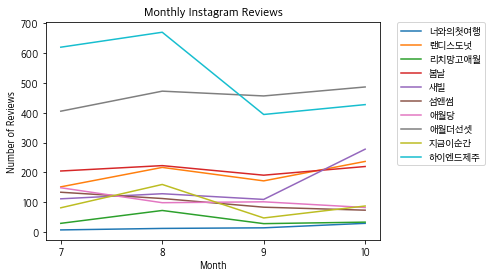

In [40]:
xticks = np.linspace(7, 10, 4, dtype = int)
g = sns.lineplot(data = df1, x = 'month', y = 'reviews', hue = 'cafe')
g.set_xticks(xticks)
g.set_xticklabels([7,8,9,10])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylabel('Number of Reviews')
plt.xlabel('Month')
plt.title('Monthly Instagram Reviews')
plt.show()
g.figure.savefig('./Analysis/insmonthlyreview.jpg')

In [35]:
df2 = dfgd.groupby(['weekno', 'cafe']).content.count().to_frame()
df2.reset_index(inplace = True)
df2.rename(columns = {'content': 'reviews'}, inplace = True)
df2 = df2[(df2.cafe != '돌카롱') & (df2.cafe != '트라이브')]
df2 = df2[df2.weekno != 46]

df2.head()

,weekno,cafe,reviews
0,27,너와의첫여행,3
2,27,랜디스도넛,19
3,27,리치망고애월,5
4,27,봄날,11
5,27,새빌,13


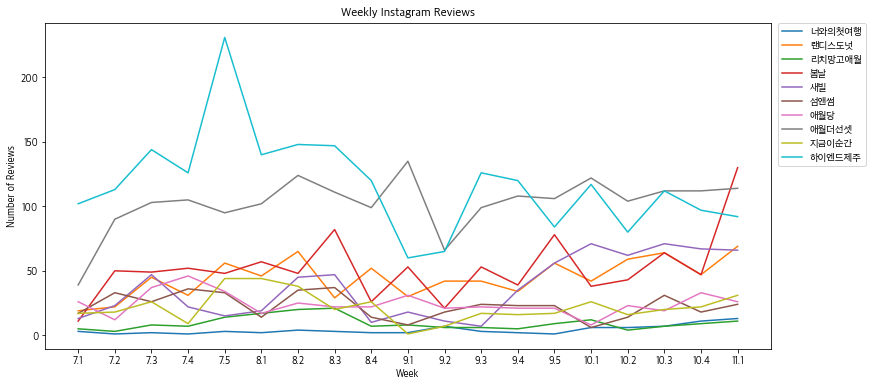

In [38]:
plt.figure(figsize = (13,6))
xticks = np.linspace(27, 45, 19, dtype = int)
g = sns.lineplot(data = df2, x = 'weekno', y = 'reviews', hue = 'cafe')
g.set_xticks(xticks)
g.set_xticklabels([7.1, 7.2, 7.3, 7.4, 7.5, 8.1, 8.2, 8.3, 8.4, 9.1, 9.2, 9.3, 9.4, 9.5, 10.1, 10.2, 10.3, 10.4, 11.1])
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
plt.ylabel('Number of Reviews')
plt.xlabel('Week')
plt.title('Weekly Instagram Reviews')
plt.show()
g.figure.savefig('./Analysis/insweeklyreview.jpg')